In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt

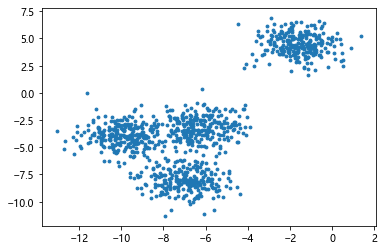

In [8]:
x,y = make_blobs(n_samples=1000,n_features=2,centers=4,random_state=1)

fig,axs = plt.subplots(1)
axs.scatter(x[:,0],x[:,1]
           ,marker='o'
           ,s=8)
plt.show()

In [47]:
n_cluster = 4
cluster = KMeans(n_clusters=n_cluster,random_state=0)
cluster = cluster.fit(x)

In [48]:
y_pred = cluster.labels_

In [49]:
centroid = cluster.cluster_centers_  # 质心

In [50]:
inertia = cluster.inertia_         #总距离平方和

In [51]:
inertia

1973.025230414848

In [52]:
color = ['red','pink','orange','gray','green','purple']

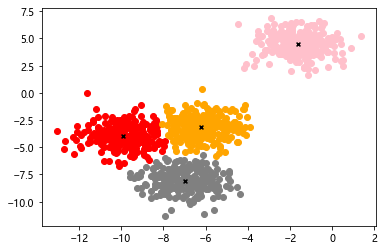

In [55]:
fig,axs = plt.subplots(1)
for i in range(n_cluster):
    axs.scatter(x[y_pred==i,0],x[y_pred==i,1]
                ,marker='o'
                ,c=color[i])
axs.scatter(centroid[:,0],centroid[:,1]
            ,marker='x'
            ,s=15
            ,c='black')
plt.show()

模型评估指标 说明
互信息分
普通互信息分
metrics.adjusted_mutual_info_score (y_pred, y_true) 
调整的互信息分
metrics.mutual_info_score (y_pred, y_true) 
标准化互信息分
metrics.normalized_mutual_info_score (y_pred, y_true)
取值范围在(0,1)之中
越接近1，聚类效果越好
在随机均匀聚类下产生0分
V-measure：基于条件上分析的一系列直观度量
同质性：是否每个簇仅包含单个类的样本
metrics.homogeneity_score(y_true, y_pred) 
完整性：是否给定类的所有样本都被分配给同一个簇中
metrics.completeness_score(y_true, y_pred) 
同质性和完整性的调和平均，叫做V-measure 
metrics.v_measure_score(labels_true, labels_pred) 
三者可以被一次性计算出来：
metrics.homogeneity_completeness_v_measure(labels_true,
labels_pred)
取值范围在(0,1)之中
越接近1，聚类效果越好
由于分为同质性和完整性两种度量，可以更仔细地研究，模型到底哪个任务
做得不够好
对样本分布没有假设，在任何分布上都可以有不错的表现
在随机均匀聚类下不会产生0分
调整兰德系数
metrics.adjusted_rand_score(y_true, y_pred)
取值在(-1,1)之间，负值象征着簇内的点差异巨大，甚至相互独立，正类的
兰德系数比较优秀，越接近1越好
对样本分布没有假设，在任何分布上都可以有不错的表现，尤其是在具
有"折叠"形状的数据上表现优秀
在随机均匀聚类下产生0分

# 轮廓系数
s = (b-a) / max(a,b)

In [62]:
from sklearn.metrics import silhouette_score,silhouette_samples     #轮廓系数
from sklearn.metrics import davies_bouldin_score    # 戴维斯-布尔丁指数
from sklearn.metrics import calinski_harabasz_score     # 卡林斯基-哈拉巴斯指数
from sklearn.metrics import confusion_matrix     # 权变矩阵




In [63]:
silhouette_score(x,y_pred)      # 轮廓洗漱均值

0.6239074614020027

In [64]:
silhouette_samples(x,y_pred)  # 每个样本的轮廓系数

array([0.66699919, 0.66300617, 0.85282883, 0.47958001, 0.73262583,
       0.63849552, 0.6068423 , 0.5727164 , 0.8564285 , 0.42943985,
       0.12575413, 0.58471774, 0.84070965, 0.84512453, 0.57629689,
       0.6487679 , 0.62622563, 0.23803112, 0.50674872, 0.66642602,
       0.65593587, 0.6869142 , 0.65168722, 0.83077912, 0.6963827 ,
       0.49869595, 0.75967791, 0.17860164, 0.82336438, 0.54018078,
       0.7051172 , 0.75170507, 0.74716604, 0.53945857, 0.81697508,
       0.82635724, 0.79398784, 0.85306   , 0.65864644, 0.31747038,
       0.36271294, 0.83909773, 0.68374034, 0.60031156, 0.72542995,
       0.64626715, 0.34067919, 0.81028125, 0.64052901, 0.66893274,
       0.82804327, 0.37812726, 0.6341058 , 0.60188421, 0.72689452,
       0.46629057, 0.27996835, 0.55284544, 0.67500745, 0.77682653,
       0.64729358, 0.75551827, 0.63213932, 0.29195931, 0.68301554,
       0.85550531, 0.83791198, 0.80748374, 0.79481257, 0.60396731,
       0.66130886, 0.76117954, 0.68499809, 0.63200851, 0.76192

In [65]:
calinski_harabasz_score(x,y_pred)

4948.187440568203